# Data Analysis Report
 After analyzing the data provided for lab mice and their test results, the following findings were observed:
 - Capomulin regimen showed good  recovery signs when tested on b128, but tumor volume increased after day 35 day, further testing should be done.
 - There is high correlation between Mouse weight and average tumor volume, further studies required on this to prove the causation.
 - More tests should be done using Propriva, since few tests were performed compared to the other drugs reginems.
 - Generally, number of mice tested for each drugs regimen varies, same number of mice should be tested to assure more accurate results. 

## Observations and Insights 

In [1]:

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import sem
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
datasheet=pd.merge(study_results,mouse_metadata,on="Mouse ID",how="left")
# Display the data table for preview
datasheet.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
datasheet["Mouse ID"].count()

1893

In [3]:
len(datasheet["Mouse ID"].unique())

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duprow=datasheet[datasheet.duplicated(subset=['Mouse ID','Timepoint'])]
duprow


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
137,g989,0,45.000000,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
#keepfalse
dubs=datasheet[datasheet.duplicated(subset=['Mouse ID','Timepoint'],keep=False)]
dubs

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_datasheet=datasheet.drop_duplicates(subset=['Mouse ID','Timepoint'],keep=False)
clean_datasheet=clean_datasheet.loc[clean_datasheet["Mouse ID"]!="g989",:]

In [7]:
# Checking the number of mice in the clean DataFrame.
clean_datasheet['Mouse ID'].count()

1880

In [8]:
len(clean_datasheet['Mouse ID'].unique())


248

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mean=clean_datasheet.groupby(['Drug Regimen']).mean()['Tumor Volume (mm3)']
med=clean_datasheet.groupby(['Drug Regimen']).median()['Tumor Volume (mm3)']
std=clean_datasheet.groupby(['Drug Regimen']).std()['Tumor Volume (mm3)']
var=clean_datasheet.groupby(['Drug Regimen']).var()['Tumor Volume (mm3)']
sem=clean_datasheet.groupby(['Drug Regimen']).sem()['Tumor Volume (mm3)']
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
#group=clean_datasheet.groupby(['Drug Regimen']).sum()
#mean=group['Tumor Volume (mm3)'].mean()
#med=group['Tumor Volume (mm3)'].median()
#std=group['Tumor Volume (mm3)'].std()
#var=group['Tumor Volume (mm3)'].var()


assembled=pd.DataFrame({
    "Mean Tumor Volume":mean,
    "Median Tumor Volume":med,
    "Tumor Volume Std. Dev.":std,
    "Tumor Volume Variance":var,
    "Tumor Volume Std. Err.":sem
})
assembled

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Std. Dev.,Tumor Volume Variance,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,4.994774,24.947764,0.329346
Ceftamin,52.591172,51.776157,6.268188,39.290177,0.469821
Infubinol,52.884795,51.820584,6.567243,43.128684,0.492236
Ketapril,55.235638,53.698743,8.279709,68.553577,0.603860
Naftisol,54.331565,52.509285,8.134708,66.173479,0.596466
Placebo,54.033581,52.288934,7.821003,61.168083,0.581331
Propriva,52.320930,50.446266,6.622085,43.852013,0.544332
Ramicane,40.216745,40.673236,4.846308,23.486704,0.320955
Stelasyn,54.233149,52.431737,7.710419,59.450562,0.573111


In [10]:
# Using the aggregation method, produce the same summary statistics in a single line
result=clean_datasheet.groupby("Drug Regimen")['Tumor Volume (mm3)'].agg(["mean","median","std","var","sem"])
result

,mean,median,std,var,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,4.994774,24.947764,0.329346
Ceftamin,52.591172,51.776157,6.268188,39.290177,0.469821
Infubinol,52.884795,51.820584,6.567243,43.128684,0.492236
Ketapril,55.235638,53.698743,8.279709,68.553577,0.603860
Naftisol,54.331565,52.509285,8.134708,66.173479,0.596466
Placebo,54.033581,52.288934,7.821003,61.168083,0.581331
Propriva,52.320930,50.446266,6.622085,43.852013,0.544332
Ramicane,40.216745,40.673236,4.846308,23.486704,0.320955
Stelasyn,54.233149,52.431737,7.710419,59.450562,0.573111


## Bar and Pie Charts

Text(0, 0.5, 'Number of Mice Tested')

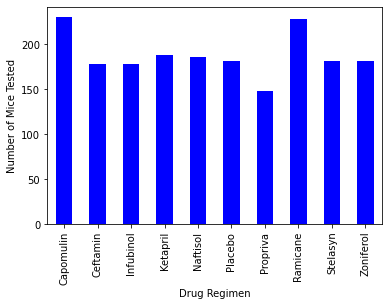

In [11]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
newgroup=clean_datasheet.groupby(["Drug Regimen"])
grp=newgroup["Timepoint"].count()
grp.plot(kind="bar",color="blue")
plt.ylabel("Number of Mice Tested")

In [12]:
df=newgroup["Drug Regimen"].count()
df



Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Drug Regimen, dtype: int64

In [13]:
ind=df.values
ind

array([230, 178, 178, 188, 186, 181, 148, 228, 181, 182], dtype=int64)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

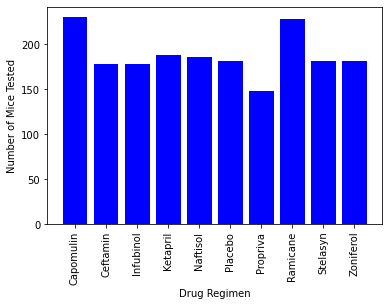

In [14]:

# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

plt.bar(df.index.values,df.values,color="blue")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.xticks(rotation="vertical")

<AxesSubplot:ylabel='Sex'>

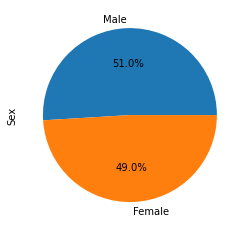

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
counts=clean_datasheet["Sex"].value_counts()
counts.plot(kind="pie",autopct="%1.1f%%")

([<matplotlib.patches.Wedge at 0xae6af32700>,
 [Text(-0.03308201408261547, 1.0995024239828841, 'Male'),
  Text(0.033082014082615095, -1.0995024239828841, 'Female')],
 [Text(-0.01804473495415389, 0.5997285948997549, '51.0%'),
  Text(0.018044734954153686, -0.5997285948997549, '49.0%')])

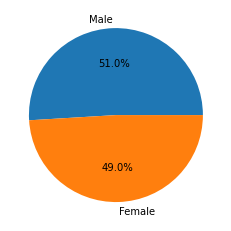

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
#values
plt.pie(counts.values, labels=counts.index.values,autopct="%1.1f%%")

## Quartiles, Outliers and Boxplots

In [17]:
last=clean_datasheet.groupby("Mouse ID")["Timepoint"].max()
last=last.reset_index()
last

,Mouse ID,Timepoint
0,a203,45
1,a251,45
2,a262,45
3,a275,45
4,a366,30
...,...,...
243,z435,10
244,z578,45
245,z581,45
246,z795,45


In [18]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
last=clean_datasheet.groupby("Mouse ID")["Timepoint"].max()
last=last.reset_index()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged=last.merge(clean_datasheet,on=["Mouse ID","Timepoint"],how="left")
merged.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29


In [19]:
print(merged["Drug Regimen"].unique())

['Infubinol' 'Placebo' 'Ceftamin' 'Stelasyn' 'Zoniferol' 'Ramicane'
 'Ketapril' 'Propriva' 'Naftisol' 'Capomulin']


In [20]:
# Put treatments into a list for for loop (and later for plot labels)
treatment=["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumorvollist=[]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for x in treatment:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    finalcount=merged.loc[merged["Drug Regimen"]==x,"Tumor Volume (mm3)"]
    
    # add subset 
    tumorvollist.append(finalcount)
    
    # Determine outliers using upper and lower bounds
    quartiles=finalcount.quantile([.25,.5,.75])
    lowerq=quartiles[.25]
    upperq=quartiles[.75]
    iqr=upperq-lowerq
    lowerbound=lowerq-(1.5*iqr)
    upperbound=upperq+(1.5*iqr)
    outliers=finalcount.loc[(finalcount<lowerbound)|(finalcount>upperbound)]
    print(f"{x}'s potential outliers:\n{outliers}\n")

Capomulin's potential outliers:
Series([], Name: Tumor Volume (mm3), dtype: float64)

Ramicane's potential outliers:
Series([], Name: Tumor Volume (mm3), dtype: float64)

Infubinol's potential outliers:
31    36.321346
Name: Tumor Volume (mm3), dtype: float64

Ceftamin's potential outliers:
Series([], Name: Tumor Volume (mm3), dtype: float64)



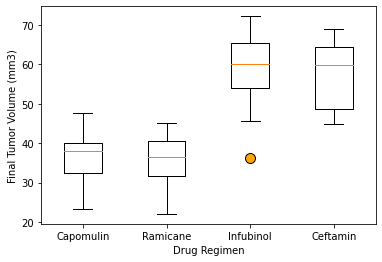

In [21]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
orange_out=dict(markerfacecolor="orange",markersize=10)
plt.boxplot(tumorvollist,labels=treatment,flierprops=orange_out)
plt.xlabel("Drug Regimen")
plt.ylabel("Final Tumor Volume (mm3)")
plt.show()

## Line and Scatter Plots

Text(0.5, 1.0, 'Capomulin treatment of mouse b128')

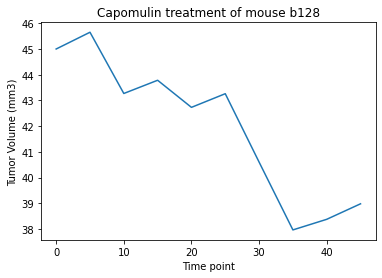

In [22]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulintable=clean_datasheet.loc[clean_datasheet["Drug Regimen"]=="Capomulin"]
#pick a mouse treated with Capomulin
mouse_data=capomulintable.loc[capomulintable["Mouse ID"]=="b128"]
plt.plot(mouse_data["Timepoint"],mouse_data["Tumor Volume (mm3)"])
plt.xlabel("Time point")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin treatment of mouse b128")

In [23]:
capomulintableAvg=capomulintable.groupby("Mouse ID").mean()
capomulintableAvg.head()

,Timepoint,Tumor Volume (mm3),Metastatic Sites,Age_months,Weight (g)
Mouse ID,,,,,
b128,22.5,41.963636,0.7,9.0,22.0
b742,22.5,40.083699,0.0,7.0,21.0
f966,10.0,36.505973,0.0,16.0,17.0
g288,22.5,41.990097,0.8,3.0,19.0
g316,22.5,44.613344,1.0,22.0,22.0


Text(0, 0.5, 'Tumor Volume (mm3)')

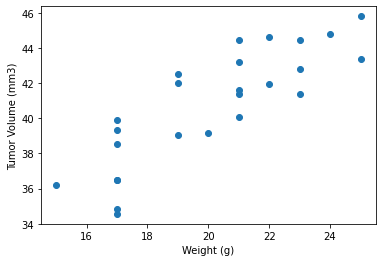

In [24]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
plt.scatter(capomulintableAvg["Weight (g)"],capomulintableAvg["Tumor Volume (mm3)"])
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")

## Correlation and Regression

In [25]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen


The correlation between mouse weight and average tumor volume for the Capomulin regimen is: 0.84
LinregressResult(slope=0.9544396890241048, intercept=21.552160532685008, rvalue=0.8419363424694721, pvalue=1.3225722434712404e-07, stderr=0.12754359033201323, intercept_stderr=2.5909876867683455)


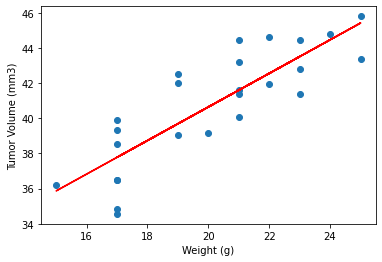

In [26]:
correlation=round(st.pearsonr(capomulintableAvg["Weight (g)"],capomulintableAvg["Tumor Volume (mm3)"])[0],2)
print(f"The correlation between mouse weight and average tumor volume for the Capomulin regimen is: {correlation:.2f}")
model=st.linregress(capomulintableAvg["Weight (g)"],capomulintableAvg["Tumor Volume (mm3)"])
print(model)
yvalues=capomulintableAvg["Weight (g)"]*model[0]+model[1]
#create the scatter plot
plt.scatter(capomulintableAvg["Weight (g)"],capomulintableAvg["Tumor Volume (mm3)"])
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
#draw the line of linear regression
plt.plot(capomulintableAvg["Weight (g)"],yvalues,color="red")

plt.show()